In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import numpy as np
import json
import tweepy as tw
import nltk
import matplotlib.cm as cm
from nltk.corpus import stopwords
from nltk import bigrams
import re
import networkx as nx
import igraph
import warnings
import community as community_louvain
warnings.filterwarnings("ignore")

In [2]:
tweet_mis = []
for line in open('./dataset/covid-misinfo-terms-small.json'):
    tweet_mis.append(json.loads(line))      

In [3]:
def load_reduced_tweet(tweet):
    if 'referenced_tweets' in tweet: 
        ref_tweets_type= tweet['referenced_tweets'][0]['type']
        ref_tweets_id= tweet['referenced_tweets'][0]['id']
    else:
        ref_tweets_type= None
        ref_tweets_id= None
    if 'in_reply_to_user_id' in tweet:
        in_reply_to_user_id= tweet['in_reply_to_user_id']
    else:
        in_reply_to_user_id=None
    reduced_tweet = {
                        'author_id' : tweet['author_id'],
                        'id' : tweet['id'],
                        'referenced_tweets_id' : ref_tweets_id,
                        'in_reply_to_user_id':in_reply_to_user_id
                        
                      }
    return reduced_tweet

def load_tweets(tweets):
    reduced_tweets=[]
    for tweet in tweets:
        if 'author_id' in tweet:
            reduced_tweets.append(load_reduced_tweet(tweet))
        elif 'tweets' in tweet:
                for a_single_tweet in tweet["tweets"]:
                    reduced_tweets.append(load_reduced_tweet(a_single_tweet))
    return reduced_tweets

In [4]:
reduced_tweet_mis = load_tweets(tweet_mis)
df_tweet_mis = pd.DataFrame(reduced_tweet_mis)
df_tweet_mis['ifmis']=1
df_tweet_mis.drop_duplicates(subset=['id'],inplace=True)
print(len(df_tweet_mis))

213110


In [5]:
tweet_nonmis = []
filename='./tweets/coronavirus_smaller_aaaa.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis)      

60000

In [6]:
filename='./tweets/coronavirus_smaller_aaab.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

120000

In [7]:
filename='./tweets/coronavirus_smaller_aaac.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

180000

In [8]:
filename='./tweets/coronavirus_smaller_aaad.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

240000

In [9]:
filename='./tweets/coronavirus_smaller_aaae.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

300000

In [10]:
filename='./tweets/coronavirus_smaller_aaag.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

360000

In [11]:
filename='./tweets/coronavirus_smaller_aaah.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

420000

In [12]:
filename='./tweets/coronavirus_smaller_aaai.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

480000

In [14]:
filename='./tweets/coronavirus_smaller_aaaj.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

600000

In [15]:
filename='./tweets/coronavirus_smaller_aaak.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

660000

In [16]:
filename='./tweets/coronavirus_smaller_aaal.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

720000

In [13]:
filename='./tweets/coronavirus_smaller_aaam.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

540000

In [17]:
filename='./tweets/coronavirus_smaller_aaan.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

780000

In [18]:
filename='./tweets/coronavirus_smaller_aaao.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

840000

In [19]:
filename='./tweets/coronavirus_smaller_aaap.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

900000

In [21]:
filename='./tweets/coronavirus_smaller_aaaq.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

960000

In [22]:
filename='./tweets/coronavirus_smaller_aaar.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

1020000

In [23]:
filename='./tweets/coronavirus_smaller_aaas.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

1080000

In [24]:
filename='./tweets/coronavirus_smaller_aaat.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

1140000

In [25]:
filename='./tweets/coronavirus_smaller_aaau.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

1200000

In [26]:
filename='./tweets/coronavirus_smaller_aaav.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

1260000

In [27]:
filename='./tweets/coronavirus_smaller_aaaw.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

1320000

In [28]:
filename='./tweets/coronavirus_smaller_aaax.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

1380000

In [29]:
filename='./tweets/coronavirus_smaller_aaay.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

1440000

In [30]:
filename='./tweets/coronavirus_smaller_aaaz.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

1500000

In [31]:
filename='./tweets/coronavirus_smaller_aaaf.json'
for line in open(filename):
        tweet_nonmis.append(json.loads(line))
len(tweet_nonmis) 

1560000

In [32]:
reduced_tweet_nonmis = load_tweets(tweet_nonmis)
df_tweet_nonmis = pd.DataFrame(reduced_tweet_nonmis)
df_tweet_nonmis['ifmis']=0
df_tweet_nonmis.drop_duplicates(subset=['id'],inplace=True)
print(len(df_tweet_nonmis))


1696906


In [33]:
aid=df_tweet_mis.id.tolist()
bid=df_tweet_mis.author_id.tolist()
cid=df_tweet_nonmis.id.tolist()
did=df_tweet_nonmis.author_id.tolist()
dic_id1={aid[i]:bid[i] for i in range(len(aid))}
dic_id2={cid[i]:did[i] for i in range(len(cid))}
dic_id={}
dic_id.update(dic_id1)
dic_id.update(dic_id2)
len(dic_id)

1907184

In [34]:
def find_sourse_author(x):
    if x == 0 or x== None:
        return None
    else:
        sid=dic_id.setdefault(x, None)
        return sid

df_tweet_mis["Source_author_id"] = df_tweet_mis['referenced_tweets_id'].apply(find_sourse_author)
df_tweet_nonmis["Source_author_id"] = df_tweet_nonmis['referenced_tweets_id'].apply(find_sourse_author)

In [35]:
print(len(df_tweet_nonmis),len(df_tweet_mis))

1696906 213110


In [36]:
df_tweet_mis['new_column'] = (df_tweet_mis['in_reply_to_user_id']==df_tweet_mis['Source_author_id'])
df_tweet_nonmis['new_column']= (df_tweet_nonmis['in_reply_to_user_id']==df_tweet_nonmis['Source_author_id'])

In [37]:
def set_sid(series):
    new_column = series["new_column"]
    Source_author_id = series["Source_author_id"]
    in_reply_to_user_id = series["in_reply_to_user_id"]
    if new_column == True or new_column== 'True':
        return Source_author_id
    else:
        if (Source_author_id == None) and (in_reply_to_user_id==None):
            return None
        elif (Source_author_id == None) and (in_reply_to_user_id!=None):
            return in_reply_to_user_id
        elif (Source_author_id != None) and (in_reply_to_user_id==None):
            return Source_author_id
        else:
            return Source_author_id
    
df_tweet_mis['Source_author_id']= df_tweet_mis.apply(set_sid,axis=1)
df_tweet_nonmis['Source_author_id']=df_tweet_nonmis.apply(set_sid,axis=1)

In [38]:
df_tweet_nonmis.dropna(subset=['Source_author_id'],inplace=True)
df_tweet_mis.dropna(subset=['Source_author_id'],inplace=True)
print(len(df_tweet_nonmis),len(df_tweet_mis))

1295926 163626


In [39]:
data = pd.concat([df_tweet_mis, df_tweet_nonmis], ignore_index=True)
data

,author_id,id,referenced_tweets_id,in_reply_to_user_id,ifmis,Source_author_id,new_column
0,126237449,1366668782677069831,1366377045694029828,None,1,21651982,False
1,1245452098935730176,1366668731124838401,1366109545727098880,1077214808,1,1077214808,True
2,1075763979778187264,1366668198364479488,1366514380557402120,633016437,1,633016437,True
3,270416438,1366667937298472960,1366657340234231812,14700117,1,14700117,True
4,1252904921416032256,1366667935390060544,1366507984239566856,None,1,917772744405671936,False
...,...,...,...,...,...,...,...
1459547,1494968155,1357368401384079361,1357099247603171330,None,0,440755794,False
1459548,908306467538825216,1357368401296052224,1357276124263419906,703964780206358528,0,703964780206358528,True
1459549,972532502,1357368401216368645,1357333955045900290,None,0,187881685,False
1459550,1348263971384651778,1357368401069563905,1356732644294356994,None,0,2767590820,False


In [2]:
data=pd.read_csv("./data_.csv")
df_tweet_nonmis=data[data['ifmis']==0]
df_tweet_mis=data[data['ifmis']==1]


In [10]:
df_tweet_mis

,author_id,id,referenced_tweets_id,in_reply_to_user_id,ifmis,Source_author_id,new_column
0,126237449,1366668782677069831,1.366377e+18,NaN,1,21651982,False
1,1245452098935730176,1366668731124838401,1.366110e+18,1.077215e+09,1,1077214808,True
2,1075763979778187264,1366668198364479488,1.366514e+18,6.330164e+08,1,633016437,True
3,270416438,1366667937298472960,1.366657e+18,1.470012e+07,1,14700117,True
4,1252904921416032256,1366667935390060544,1.366508e+18,NaN,1,917772744405671936,False
...,...,...,...,...,...,...,...
163621,865585619233263616,1355667889039179782,1.355667e+18,7.026573e+17,1,702657321852243968,False
163622,1043185714437992449,1355652748000288777,1.355650e+18,NaN,1,17494010,False
163623,68825587,1355667692917813254,1.355667e+18,1.615662e+08,1,161566176,False
163624,3349241,1355667443784495107,1.355663e+18,NaN,1,17094311,False


In [11]:
df_tweet_nonmis

,author_id,id,referenced_tweets_id,in_reply_to_user_id,ifmis,Source_author_id,new_column
163626,1275531383021146112,1357411152720928768,1.357351e+18,NaN,0,18839785,False
163627,344269254,1357411152368648193,1.357410e+18,NaN,0,1165693742638084096,False
163628,4825557477,1357411152289009667,1.357313e+18,NaN,0,12848262,False
163629,2866489102,1357411152167337990,1.357395e+18,NaN,0,15675013,False
163630,1211482698708946944,1357411151684993029,1.357116e+18,NaN,0,24736864,False
...,...,...,...,...,...,...,...
1459547,1494968155,1357368401384079361,1.357099e+18,NaN,0,440755794,False
1459548,908306467538825216,1357368401296052224,1.357276e+18,7.039648e+17,0,703964780206358528,True
1459549,972532502,1357368401216368645,1.357334e+18,NaN,0,187881685,False
1459550,1348263971384651778,1357368401069563905,1.356733e+18,NaN,0,2767590820,False


In [3]:
nonmis_network_data= df_tweet_nonmis[['author_id', 'Source_author_id']]
nonmis_network_data['weight']=0
nonmis_network_data=nonmis_network_data.groupby(['author_id', 'Source_author_id'], as_index=False).count()
nonmis_network_data['ifmis']=0
mis_network_data= df_tweet_mis[['author_id', 'Source_author_id']]
mis_network_data['weight']=0
mis_network_data=mis_network_data.groupby(['author_id', 'Source_author_id'], as_index=False).count()
mis_network_data['ifmis']=1
network_data=pd.concat([nonmis_network_data, mis_network_data], ignore_index=True)
print(len(nonmis_network_data),len(mis_network_data))

1162255 140816


In [4]:
G=nx.from_pandas_edgelist(network_data, 'author_id', 'Source_author_id', ["weight","ifmis"], create_using = nx.DiGraph())

In [5]:
print("Number of g nodes:",G.number_of_nodes())
print("Number of g edges:",G.size())

Number of g nodes: 925004
Number of g edges: 1300472


In [6]:
nx.degree_histogram(G)

[0,
 618893,
 156100,
 55142,
 28159,
 16142,
 10478,
 7339,
 5078,
 3820,
 2916,
 2396,
 1933,
 1576,
 1343,
 1107,
 871,
 810,
 684,
 571,
 595,
 498,
 441,
 384,
 358,
 317,
 283,
 270,
 253,
 237,
 232,
 212,
 199,
 181,
 140,
 156,
 161,
 116,
 126,
 110,
 109,
 120,
 92,
 86,
 90,
 94,
 97,
 87,
 83,
 69,
 81,
 69,
 67,
 71,
 71,
 65,
 58,
 58,
 52,
 55,
 39,
 52,
 35,
 53,
 39,
 40,
 33,
 43,
 37,
 29,
 41,
 32,
 32,
 29,
 36,
 30,
 41,
 29,
 33,
 25,
 31,
 30,
 32,
 25,
 20,
 36,
 23,
 24,
 17,
 16,
 32,
 22,
 20,
 20,
 20,
 22,
 20,
 24,
 14,
 17,
 12,
 16,
 18,
 14,
 17,
 11,
 18,
 15,
 12,
 14,
 25,
 21,
 11,
 9,
 17,
 8,
 13,
 15,
 10,
 9,
 14,
 9,
 10,
 10,
 10,
 11,
 10,
 3,
 8,
 15,
 10,
 13,
 7,
 4,
 13,
 4,
 12,
 5,
 6,
 10,
 6,
 7,
 9,
 10,
 7,
 14,
 4,
 10,
 9,
 6,
 5,
 4,
 7,
 3,
 11,
 11,
 6,
 7,
 5,
 2,
 5,
 5,
 6,
 3,
 8,
 5,
 6,
 7,
 10,
 6,
 8,
 7,
 7,
 2,
 7,
 8,
 9,
 9,
 6,
 6,
 4,
 9,
 5,
 5,
 3,
 5,
 6,
 2,
 2,
 4,
 7,
 4,
 2,
 6,
 4,
 6,
 2,
 4,
 6,
 4,
 6

In [30]:
G_componrnts=nx.strongly_connected_components(G)
largest_components=max(G_componrnts,key=len)
subgraph_nodes=list(largest_components)
G_subgraph=G.subgraph(subgraph_nodes)

print("Number of g nodes:",G_subgraph.number_of_nodes())
print("Number of g edges:",G_subgraph.size())

Number of g nodes: 8808
Number of g edges: 29690


In [31]:
subgraph= nx.to_pandas_edgelist(G_subgraph)
subgraph


,source,target,weight,ifmis
0,765923012185030656,19242147,1,1
1,765923012185030656,25328560,1,1
2,765923012185030656,41640982,1,1
3,765923012185030656,206996636,1,1
4,765923012185030656,456857992,1,1
...,...,...,...,...
29685,246775748,1207618644705992704,1,0
29686,225443793,859306879,1,0
29687,53084130,2853461537,1,0
29688,2343206898,427689510,1,1


In [32]:
subgraph['ifmis'].value_counts()

0    17092
1    12598
Name: ifmis, dtype: int64

In [13]:
G_mis = nx.from_pandas_edgelist(mis_network_data, 'author_id', 'Source_author_id', ["weight","ifmis"], create_using = nx.DiGraph())
G_nonmis = nx.from_pandas_edgelist(nonmis_network_data, 'author_id', 'Source_author_id', ["weight","ifmis"], create_using = nx.DiGraph())

In [14]:
Gmis_componrnts=nx.strongly_connected_components(G_mis)
largest_components=max(Gmis_componrnts,key=len)
subgraph_nodes=list(largest_components)
Gmis_subgraph=G_mis.subgraph(subgraph_nodes)

print("Number of g nodes:",Gmis_subgraph.number_of_nodes())
print("Number of g edges:",Gmis_subgraph.size())

Number of g nodes: 2156
Number of g edges: 6679


In [15]:
Gnmis_componrnts=nx.strongly_connected_components(G_nonmis)
largest_components=max(Gnmis_componrnts,key=len)
subgraph_nodes=list(largest_components)
Gnmis_subgraph=G_nonmis.subgraph(subgraph_nodes)
print("Number of g nodes:",Gnmis_subgraph.number_of_nodes())
print("Number of g edges:",Gnmis_subgraph.size())

Number of g nodes: 3706
Number of g edges: 10217


In [16]:
df_Gnmis_subgraph = nx.to_pandas_edgelist(Gnmis_subgraph)
df_Gmis_subgraph = nx.to_pandas_edgelist(Gmis_subgraph)

In [17]:
df_Gmis_subgraph['source']=df_Gmis_subgraph['source'].astype(int)
df_Gmis_subgraph['target']=df_Gmis_subgraph['target'].astype(int)
df_Gnmis_subgraph['source']=df_Gnmis_subgraph['source'].astype(int)
df_Gnmis_subgraph['target']=df_Gnmis_subgraph['target'].astype(int)

In [18]:
data_subgraph = pd.concat([df_Gmis_subgraph, df_Gnmis_subgraph], ignore_index=True)
data_subgraph

,source,target,weight,ifmis
0,852983071863316480,19242147,1,1
1,852983071863316480,1259415607746887680,1,1
2,1299153797500018689,263561921,1,1
3,1299153797500018689,272118514,1,1
4,1299153797500018689,314935651,1,1
...,...,...,...,...
16891,14499829,14499829,44,0
16892,14499829,189868631,2,0
16893,550477821,52755452,1,0
16894,550477821,58252927,1,0


In [33]:
def apply_id(x):
    index=dic_id[x]
    return index
id1=subgraph.source.unique().tolist()
id2=subgraph.target.unique().tolist()
id3=id1+id2
id4 = list(set(id3)) 
dic_id = {id4[i]:i for i in range(len(id4))}
subgraph["source"] = subgraph["source"].apply(apply_id)
subgraph["target"]  = subgraph["target"].apply(apply_id)
subgraph.sort_values("source",inplace=True)
subgraph

0    17092
1    12598
Name: ifmis, dtype: int64

In [35]:
subgraph

,source,target,weight,ifmis
0,0,1894,1,1
11,0,3054,1,1
10,0,2376,1,1
9,0,3807,1,1
7,0,6269,1,1
...,...,...,...,...
29685,8803,7110,1,0
29686,8804,8490,1,0
29687,8805,6347,1,0
29688,8806,404,1,1


In [19]:
def apply_id(x):
    index=dic_id[x]
    return index
id1=data_subgraph.source.unique().tolist()
id2=data_subgraph.target.unique().tolist()
id3=id1+id2
id4 = list(set(id3)) 
dic_id = {id4[i]:i for i in range(len(id4))}
data_subgraph["source"] = data_subgraph["source"].apply(apply_id)
data_subgraph["target"]  = data_subgraph["target"].apply(apply_id)
data_subgraph.sort_values("source",inplace=True)
data_subgraph['ifmis'].value_counts()

0    10217
1     6679
Name: ifmis, dtype: int64

In [38]:
subgraph

,source,target,weight,ifmis
0,0,1894,1,1
11,0,3054,1,1
10,0,2376,1,1
9,0,3807,1,1
7,0,6269,1,1
...,...,...,...,...
29685,8803,7110,1,0
29686,8804,8490,1,0
29687,8805,6347,1,0
29688,8806,404,1,1


In [42]:
node1 = subgraph.groupby(['source'])['ifmis'].max()
node2 = subgraph.groupby(['target'])['ifmis'].max()
node1 = pd.DataFrame(node1)
node1 = node1.reset_index()
new_col = ['name', 'lable']
node1.columns = new_col
node2 = pd.DataFrame(node2)
node2 = node2.reset_index()
node2.columns = new_col
node = pd.merge(node1,node2,on='name',how='outer') 
node['lable_x'].fillna(0, inplace=True)
node['lable_y'].fillna(0, inplace=True)
node['lable']=node['lable_x']+node['lable_y']
node = node[['name','lable']]
node.sort_values("name",inplace=True)
node

,name,lable
0,0,2
1,1,1
2,2,2
3,3,2
4,4,0
...,...,...
8803,8803,0
8804,8804,0
8805,8805,0
8806,8806,2


In [36]:
df_node1 = data_subgraph.groupby(['source'])['ifmis'].max()
df_node2 = data_subgraph.groupby(['target'])['ifmis'].max()
df_node1 = pd.DataFrame(df_node1)
df_node1 = df_node1.reset_index()
new_col = ['name', 'lable']
df_node1.columns = new_col
df_node2 = pd.DataFrame(df_node2)
df_node2 = df_node2.reset_index()
df_node2.columns = new_col
df_node = pd.merge(df_node1,df_node2,on='name',how='outer') 
df_node['lable_x'].fillna(0, inplace=True)
df_node['lable_y'].fillna(0, inplace=True)
df_node['lable']=df_node['lable_x']+df_node['lable_y']
df_node = df_node[['name','lable']]
df_node.sort_values("name",inplace=True)
df_node

,name,lable
0,0,0
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
5628,5628,0
5629,5629,0
5630,5630,0
5631,5631,2


In [21]:
def setlable(x):
    if x>=1:
        return 1
    else:
        return 0

df_node["lable"] = df_node["lable"] .apply(setlable)
df_node=df_node[['name','lable']]

In [43]:

node["lable"] = node["lable"] .apply(setlable)
node=node[['name','lable']]

In [44]:
node

,name,lable
0,0,1
1,1,1
2,2,1
3,3,1
4,4,0
...,...,...
8803,8803,0
8804,8804,0
8805,8805,0
8806,8806,1


In [45]:
node['lable'].value_counts()

1    4810
0    3998
Name: lable, dtype: int64

In [26]:
data_subgraph['ifmis'].value_counts()

0    10217
1     6679
Name: ifmis, dtype: int64

In [23]:
df_node

,name,lable
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
5628,5628,0
5629,5629,0
5630,5630,0
5631,5631,1


In [46]:
data_subgraph

,source,target,weight,ifmis
13384,0,2882,1,0
7,1,4991,3,1
16,2,4049,1,1
15,2,1449,1,1
14,2,1175,4,1
...,...,...,...,...
16870,5628,2470,3,0
16878,5629,5440,1,0
16886,5630,4196,1,0
6671,5631,267,1,1


In [47]:
subgraph

,source,target,weight,ifmis
0,0,1894,1,1
11,0,3054,1,1
10,0,2376,1,1
9,0,3807,1,1
7,0,6269,1,1
...,...,...,...,...
29685,8803,7110,1,0
29686,8804,8490,1,0
29687,8805,6347,1,0
29688,8806,404,1,1


In [27]:
df_node['lable'].value_counts()

0    3477
1    2156
Name: lable, dtype: int64

In [24]:
df_node.to_csv("./data_node.csv",index=False)
data_subgraph.to_csv("./data_edge.csv",index=False)

In [48]:
node.to_csv("./node.csv",index=False)
subgraph.to_csv("./edge.csv",index=False)

In [25]:
dic_id

{774893753878315008: 0,
 900874555329216513: 1,
 1251170519694573570: 2,
 1309145041957421059: 3,
 1280840636837527555: 4,
 1296232565762752514: 5,
 813914393788481540: 6,
 1257596262649561089: 7,
 1362780575166300168: 8,
 1321899339585912841: 9,
 1111942741066481665: 10,
 827930317528891394: 11,
 1128749243152334860: 12,
 1246638830943272965: 13,
 1266300047055978501: 14,
 1098253456639328262: 15,
 1252594697807134728: 16,
 1303797127651393547: 17,
 1350455495757332491: 18,
 1675690008: 19,
 508788780: 20,
 353140801: 21,
 2507407429: 22,
 271876168: 23,
 1322482041062100992: 24,
 40435788: 25,
 213942360: 26,
 578257014: 27,
 2797961335: 28,
 1325154634898477056: 29,
 813739338831892480: 30,
 1333990316718821376: 31,
 1327902159246069760: 32,
 706863698976051200: 33,
 831944787762745345: 34,
 735904952506257408: 35,
 721487027401789441: 36,
 828548768349949953: 37,
 1325385910175797249: 38,
 742831526086316033: 39,
 54886540: 40,
 3312910489: 41,
 2565865626: 42,
 632160413: 43,
 167

In [54]:
G=nx.from_pandas_edgelist(data_subgraph, 'source', 'target', ["weight","ifmis"],create_using = nx.DiGraph())

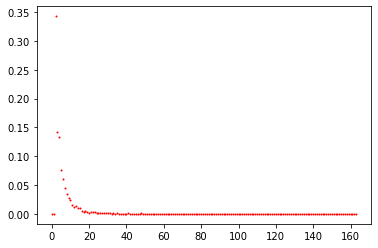

In [55]:
G_degree =  nx.degree_histogram(G)          #返回图中所有节点的度分布序列

x=range(len(G_degree))#生成X轴序列，从1到最大度
y=[z/float(sum(G_degree))for z in G_degree]#将频次转化为频率，利用列表内涵
plt.scatter(x,y,s=1,color=(1,0,0))#在双对坐标轴上绘制度分布曲线
plt.show()#显示图表                                         

In [63]:
G_degree 

[0,
 0,
 1932,
 799,
 750,
 431,
 337,
 249,
 191,
 154,
 133,
 87,
 66,
 75,
 58,
 54,
 29,
 23,
 27,
 14,
 13,
 17,
 22,
 14,
 12,
 11,
 8,
 10,
 5,
 9,
 11,
 5,
 4,
 6,
 3,
 5,
 3,
 3,
 1,
 2,
 2,
 5,
 2,
 1,
 3,
 0,
 3,
 1,
 5,
 0,
 3,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 4,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [53]:
igraph.summary(G)

IGRAPH UNW- 5633 16896 -- 
+ attr: lable (v), name (v), ifmis (e), weight (e)


In [58]:
betweenness=nx.betweenness_centrality(G)

In [62]:
for k, v in betweenness.items():
    if v == max(betweenness.values()):
        class_1 = k
print("max key:",class_1)
print("max value:",max(betweenness.values()))

max key: 1674
max value: 0.1725696172261853


In [ ]:
def getValue(value):
    colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
    return colorList[int(value)]

visual_style = dict()
visual_style['vertex_size']=5
visual_style['edge_width=']=0.1
visual_style['vertex_color'] = list(map(getValue, (G.vs['lable'])))
visual_style['bbox'] = [0, 0, 800, 800]

igraph.plot(G, **visual_style,layout="kamada_kawai")

In [ ]:

igraph.plot(G, **visual_style,layout="kamada_kawai")